In [ ]:
import tensorflow as tf
import os
import requests
import numpy as np

Code based on HuggingFace's [great notebooks](https://huggingface.co/transformers/notebooks.html)

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 12.8MB/s 
     |████████████████████████████████| 1.1MB 22.4MB/s 
     |████████████████████████████████| 890kB 49.3MB/s 
     |████████████████████████████████| 2.9MB 55.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=894cdcf6328bd27a63148e735a88b4ac1d22e9d797eeaed4aee026da74b2d57d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


# Transformers

High-level Transformer library!

In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
classifier('We are very happy to learn the Transformers library.')

[{'label': 'POSITIVE', 'score': 0.9997990727424622}]

You can equivalently use the models directly:

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tf_model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


this is equivalent to:

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

model = TFDistilBertForSequenceClassification.from_pretrained(model_name)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

In [ ]:
tf_input = tokenizer(['We are very happy to learn the Transformers library.'], return_tensors="tf")
tf_input

{'input_ids': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=
array([[  101,  2057,  2024,  2200,  3407,  2000,  4553,  1996, 19081,
         3075,  1012,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [ ]:
tf_outputs = tf_model(tf_input)
tf_outputs

(<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-4.126616 ,  4.3855367]], dtype=float32)>,)

In [ ]:
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
tf_predictions

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2.0097027e-04, 9.9979907e-01]], dtype=float32)>

In [ ]:
# Here how we save the model and tokenizer. no need to do it, as we did not fine-tune the model
# tokenizer.save_pretrained(save_directory)
# model.save_pretrained(save_directory)

> **TF{**Model**}** Generic, for all cases, can be specialized as you want


> **TF{**Model**}ForSequenceClassification** 
  * Text Classification
  * Sentiment Analysis ("*sentiment-analysis*")

> **TF{**Model**}ForQuestionAnswering** 
  * QA ("*question-answering*")

> **TF{**Model**}WithLMHead** 
  * MLM ("*fill-mask*")
  * Text Generation ("*text-generation*", "*text2text-generation*")
  * Translation ("*translation_xx_to_yy", ...)

> **TF{**Model**}ForTokenClassification** 
  * NER ("*ner*")
  * POS tagging 


In [ ]:
context = 'Hugging Face is a French company based in New-York.'
question = 'Where is based Hugging Face ?'
nlp_qa = pipeline('question-answering')
nlp_qa(context=context, question=question)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1423: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


{'answer': 'New-York.', 'end': 50, 'score': 0.9633594155311584, 'start': 42}

In [ ]:
from transformers import TFAutoModelWithLMHead

model = TFAutoModelWithLMHead.from_pretrained("t5-base", return_dict=True)
tokenizer = AutoTokenizer.from_pretrained("t5-base")

inputs = tokenizer.encode("translate English to German: The teacher was happy to train the language model", return_tensors="tf")
outputs = model.generate(inputs, max_length=40, num_beams=4, early_stopping=True)

print(tokenizer.decode(outputs[0]))

/usr/local/lib/python3.6/dist-packages/transformers/modeling_tf_auto.py:720: FutureWarning: The class `TFAutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `TFAutoModelForCausalLM` for causal language models, `TFAutoModelForMaskedLM` for masked language models and `TFAutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.



Der Lehrer war froh, das Sprachmodell zu schulen.


# Text Classification

In [ ]:
import tensorflow_datasets as tfds

train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    batch_size=-1)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1NMKTG/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1NMKTG/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1NMKTG/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


The only problem that I find with the HuggingFace library is that it is very hard to start from a dataset and keep this format for the whole training. See [here](https://github.com/huggingface/transformers/issues/3851)

Fine-tuning works like this: 

**raw strings/integers -> tokenizer (without return_tensors) -> convert to Dataset -> train model normally**

This way: *Dataset -> tokenizer -> train* IS NOT STRAIGHTFORWARD .

For example, the function *glue_convert_examples_to_features* allows as input datasets and applies the tokenizer on its own. Check the code and see how far this is from straightforward: line [79-107](https://github.com/huggingface/transformers/blob/master/src/transformers/data/processors/glue.py)

In [ ]:
train_texts = [str(t)[2:-1] for t in tfds.as_numpy(train_data["text"])]
train_labels = list(tfds.as_numpy(train_data["label"]))

validation_texts = [str(t)[2:-1] for t in tfds.as_numpy(validation_data["text"])]
validation_labels = list(tfds.as_numpy(validation_data["label"]))

test_texts = [str(t)[2:-1] for t in tfds.as_numpy(test_data["text"])]
test_labels = list(tfds.as_numpy(test_data["label"]))

In [ ]:
train_texts[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [ ]:
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_19', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
max_len = 100

train_encodings = tokenizer(train_texts, truncation=True, max_length=max_len, padding=True)
validation_encodings = tokenizer(validation_texts, truncation=True, max_length=max_len, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, max_length=max_len, padding=True)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((dict(validation_encodings), validation_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Transformers throws an error if more than one metric is added to the model...

In [ ]:
model.fit(train_dataset.shuffle(1000).batch(64), 
          epochs=3,
          validation_data = validation_dataset.batch(64))

Epoch 1/3
235/235 [==============================] - 186s 793ms/step - loss: 0.4219 - accuracy: 0.7965 - val_loss: 0.3727 - val_accuracy: 0.8443
Epoch 2/3
235/235 [==============================] - 187s 798ms/step - loss: 0.2639 - accuracy: 0.8921 - val_loss: 0.3961 - val_accuracy: 0.8439
Epoch 3/3
235/235 [==============================] - 187s 796ms/step - loss: 0.1579 - accuracy: 0.9413 - val_loss: 0.5311 - val_accuracy: 0.8461


In [ ]:
model.evaluate(test_dataset.batch(64))

391/391 [==============================] - 85s 217ms/step - loss: 0.5193 - accuracy: 0.8451


[0.5192921757698059, 0.8451200127601624]

In [ ]:
text = ['this movie has bad actors in it']
encodings = tokenizer(text, truncation=True, max_length=max_len, padding=True)
tfdataset = tf.data.Dataset.from_tensor_slices(dict(encodings))
preds = model.predict(tfdataset.batch(1))
preds = tf.keras.activations.softmax(tf.convert_to_tensor(preds)).numpy()
preds

array([[[0.9971903, 0.0028097]]], dtype=float32)

# Text Generation

In [ ]:
from transformers import  OpenAIGPTTokenizer, TFOpenAIGPTLMHeadModel

model = TFOpenAIGPTLMHeadModel.from_pretrained("openai-gpt")
tokenizer = OpenAIGPTTokenizer.from_pretrained("openai-gpt")

All model checkpoint layers were used when initializing TFOpenAIGPTLMHeadModel.

All the layers of TFOpenAIGPTLMHeadModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTLMHeadModel for predictions without further training.


ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [ ]:
prompt_text = "The king said to the queen:"
encoded_prompt = tokenizer.encode(prompt_text,
                                  add_special_tokens=False,
                                  return_tensors="tf")
encoded_prompt

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[ 481,  618,  603,  485,  481, 3016,  271]], dtype=int32)>

In [ ]:
num_sequences = 5
length = 40

generated_sequences = model.generate(
    input_ids=encoded_prompt,
    do_sample=True,
    max_length=length + len(encoded_prompt[0]),
    temperature=1.0,
    top_k=0,
    top_p=0.9,
    repetition_penalty=1.0,
    num_return_sequences=num_sequences,
)

In [ ]:
for sequence in generated_sequences:
    text = tokenizer.decode(sequence, clean_up_tokenization_spaces=True)
    print(text)
    print("-" * 80)

the king said to the queen : 
 " the peasant was the equal to the queen. she sent a lackey to the queen and he took her to the king. then he attacked her, beaten her, struck her, raped her.
--------------------------------------------------------------------------------
the king said to the queen : " soon, i 'll be crowned king and you 'll be sent to a lightskirt. " 
 queen deidre then waved her arms at her daughters. " we 'd better get to the hotel. we
--------------------------------------------------------------------------------
the king said to the queen : " let us make the exchange. " 
 " and the other two? " 
 " i have a doctor who can remove the effects of the object on your children, " said the king.
--------------------------------------------------------------------------------
the king said to the queen : " will i never see her smile? will i never see her laugh? will i ever experience all of her beauty and happiness? is this not a promise i can make? " 
 king eurilas
------

The preprocessing steps vary for different models. Check the generate function closely if interested to see these differences: https://github.com/huggingface/transformers/blob/master/examples/text-generation/run_generation.py (It's in Pytorch but most of it is one to one for TF)

More information on the parameters of the generation function: https://github.com/huggingface/blog/blob/master/notebooks/02_how_to_generate.ipynb

# Tokenizers Library

Library with a richer set of options to create your own Tokenizer.

It works hand in hand with Transformers

Much faster than the built-in Tokenizers in Transformers! 

If you see a Fast..Tokenizer in the Transformers library it is actually a wrapper to the Tokenizer library

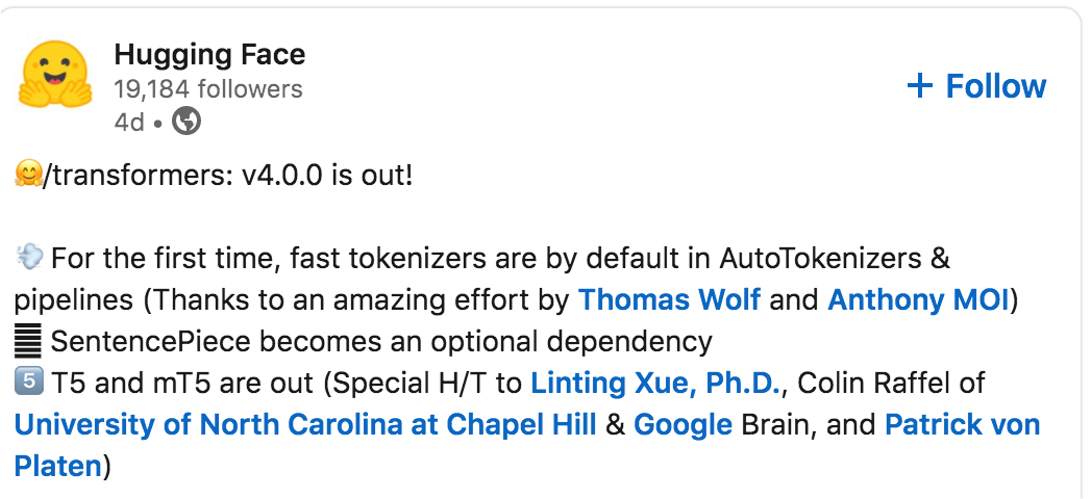

## From Scratch

In [ ]:
text_url = 'https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt'

with open('big.txt', 'wb') as file:
    response = requests.get(text_url, )
    file.write(response.content)

Separate Tokenizers library that goes hand in hand with the Transformers library

* **Normalizer:** Executes all the initial transformations over the initial input string. (lowercase some text, strip spaces or accents, unicode normalization -NFKC- or -NFD-)

* **PreTokenizer:** Splitting the initial input string. (character-level, white space, special rule-based)

* **Model:** Sub-token discovery and generation. This part is trainable and dependant of input data. (words, BPE, WordPiece)

* **Post-Processor:** Construction features to be compatible with some of the Transformers-based models. (for BERT it would wrap the tokenized sentence around [CLS] and [SEP] tokens)

* **Decoder:** In charge of mapping back a tokenized input to the original string. The decoder is usually chosen according to the PreTokenizer we used previously.

* **Trainer** Provides training capabilities to each model.




In [ ]:
from tokenizers import Tokenizer
from tokenizers.normalizers import Lowercase, NFKC, Sequence
from tokenizers.pre_tokenizers import ByteLevel
from tokenizers.models import BPE
from tokenizers.decoders import ByteLevel as ByteLevelDecoder
from tokenizers.trainers import BpeTrainer

**Byte-level BPE:** BPE needs a base vocabulary to start merging. The base vocabulary ccan be large ( e.g. all unicode characters) Byte-level reduces the base vocabulary to bytes (256 bytes tokens). In this way no unknown characters (even emojis)

Train a tokenizer from scratch:

In [ ]:
model = BPE()

tokenizer = Tokenizer(model) # empty tokenizer

tokenizer.normalizer = Sequence([
    NFKC(),
    Lowercase()
])

tokenizer.pre_tokenizer = ByteLevel()
tokenizer.decoder = ByteLevelDecoder()

In [ ]:
len(ByteLevel.alphabet())

256

In [ ]:
trainer = BpeTrainer(vocab_size=25000, initial_alphabet=ByteLevel.alphabet(),
                     special_tokens=["[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.train(trainer, ["big.txt"])

In [ ]:
tokenizer.model.save('.')

['./vocab.json', './merges.txt']

In [ ]:
tokenizer.model = BPE.from_file('vocab.json', 'merges.txt')
encoding = tokenizer.encode("I am the transformer teacher dutz")

print(encoding.tokens)

decoded = tokenizer.decode(encoding.ids)
print(decoded)

['Ġi', 'Ġam', 'Ġthe', 'Ġtransform', 'er', 'Ġteacher', 'Ġdut', 'z']
 i am the transformer teacher dutz


In [ ]:
encoding.offsets[3]

(8, 18)

In [ ]:
tokenizer.token_to_id("[SEP]")

1

**Post-processing** 

1)For example give the structure to the inputs

In [ ]:
from tokenizers.processors import TemplateProcessing

tokenizer.post_processor = TemplateProcessing(
    single="[CLS] $A [SEP]",
    pair="[CLS] $A [SEP] $B:1 [SEP]:1",
    special_tokens=[
        ("[CLS]", tokenizer.token_to_id("[CLS]")),
        ("[SEP]", tokenizer.token_to_id("[SEP]")),
    ],
)

\$A represents the first sentence and \$B the second one. :1 means the **type_id**, default is 0

2) padding

In [ ]:
tokenizer.enable_padding(pad_id=tokenizer.token_to_id("[PAD]"), pad_token="[PAD]", length=24)

In [ ]:
output = tokenizer.encode("Hello, y'all!", "How are you 😁 ?")
print(output.tokens)

['[CLS]', 'Ġhell', 'o', ',', 'Ġy', "'", 'all', '!', '[SEP]', 'Ġhow', 'Ġare', 'Ġyou', 'Ġ', 'ð', 'Ł', 'ĺ', 'ģ', 'Ġ', '?', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [ ]:
print(output.attention_mask)
print(output.special_tokens_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


# SQuAD QA

We will use TPU units so that you learn how to apply it! Change the runtime type to TPU

In [ ]:
max_len = 100

The output layer needs to think that there are 100 categories. and a softmax will decide which position is the the begging token and end token

In [ ]:
from transformers import BertTokenizer, TFBertModel
from tokenizers import BertWordPieceTokenizer

slow_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
save_path = "bert_base_uncased/"
os.makedirs(save_path)
slow_tokenizer.save_pretrained(save_path)

# Load the fast tokenizer from saved file
tokenizer = BertWordPieceTokenizer("bert_base_uncased/vocab.txt", lowercase=True)

Almost same preprocessing as Lab 6. We use BERT's own tokenizer and not the one from Keras. Changes marked with #N

In [ ]:
train_data_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v1.1.json"
train_path = tf.keras.utils.get_file("train.json", train_data_url)
eval_data_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v1.1.json"
eval_path = tf.keras.utils.get_file("eval.json", eval_data_url)

import json

with open(train_path) as f:
    raw_train_data = json.load(f)

with open(eval_path) as f:
    raw_eval_data = json.load(f)

In [ ]:
class SquadExample:
    def __init__(self, question, context, start_char_idx, answer_text, all_answers):
        self.question = question
        self.context = context
        self.start_char_idx = start_char_idx
        self.answer_text = answer_text
        self.all_answers = all_answers     #N
        self.skip = False

    def preprocess(self):
        context = self.context
        question = self.question
        answer_text = self.answer_text
        start_char_idx = self.start_char_idx

        # Find end character index of answer in context
        end_char_idx = start_char_idx + len(answer_text)
        if end_char_idx >= len(context):
            self.skip = True
            return

        # Mark the character indexes in context that are in answer
        is_char_in_ans = [0] * len(context)
        for idx in range(start_char_idx, end_char_idx):
            is_char_in_ans[idx] = 1

        # Tokenize context
        tokenized_context = tokenizer.encode(context)                  #N

        # Find tokens that were created from answer characters
        ans_token_idx = []
        for idx, (start, end) in enumerate(tokenized_context.offsets): #N
            if sum(is_char_in_ans[start:end]) > 0:                     #N
                ans_token_idx.append(idx)                              #N

        if len(ans_token_idx) == 0:
            self.skip = True
            return

        # Find start and end token index for tokens from answer
        start_token_idx = ans_token_idx[0]
        end_token_idx = ans_token_idx[-1]

        # Tokenize question
        tokenized_question = tokenizer.encode(question)                #N

        # Create inputs
        input_ids = tokenized_context.ids + tokenized_question.ids[1:] # Do not include the second <start> separator
        token_type_ids = [0] * len(tokenized_context.ids) + [1] * len(
            tokenized_question.ids[1:]
        )
        attention_mask = [1] * len(input_ids)

        # Pad and create attention masks.
        # Skip if truncation is needed
        padding_length = max_len - len(input_ids)
        if padding_length > 0:  # pad
            input_ids = input_ids + ([0] * padding_length)
            attention_mask = attention_mask + ([0] * padding_length)
            token_type_ids = token_type_ids + ([0] * padding_length)
        elif padding_length < 0:  # skip
            self.skip = True
            return

        self.input_ids = input_ids
        self.token_type_ids = token_type_ids
        self.attention_mask = attention_mask
        self.start_token_idx = start_token_idx
        self.end_token_idx = end_token_idx
        self.context_token_to_char = tokenized_context.offsets #N

In [ ]:
def create_squad_examples(raw_data):
    squad_examples = []
    for item in raw_data["data"]:
        for para in item["paragraphs"]:
            context = para["context"]
            for qa in para["qas"]:
                question = qa["question"]
                answer_text = qa["answers"][0]["text"]
                start_char_idx = qa["answers"][0]["answer_start"]
                all_answers = [_["text"] for _ in qa["answers"]].   #N
                squad_eg = SquadExample(
                    question, context, start_char_idx, answer_text, all_answers
                )
                squad_eg.preprocess()
                squad_examples.append(squad_eg)
    return squad_examples
  
train_squad_examples = create_squad_examples(raw_train_data)
eval_squad_examples = create_squad_examples(raw_eval_data)

In [ ]:
def create_inputs_targets(squad_examples):
    dataset_dict = {
        "input_ids": [],
        "token_type_ids": [],
        "attention_mask": [],
        "start_token_idx": [],
        "end_token_idx": [],
    }
    for item in squad_examples:
        if item.skip == False:
            for key in dataset_dict:
                dataset_dict[key].append(getattr(item, key))
    for key in dataset_dict:
        dataset_dict[key] = np.array(dataset_dict[key])

    x = [
        dataset_dict["input_ids"],
        dataset_dict["token_type_ids"],
        dataset_dict["attention_mask"],
    ]
    y = [dataset_dict["start_token_idx"], dataset_dict["end_token_idx"]]
    return x, y

x_train, y_train = create_inputs_targets(train_squad_examples)
x_eval, y_eval = create_inputs_targets(eval_squad_examples)

Now the TPU configuration

In [ ]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.107.185.50:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.107.185.50:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
encoder = TFBertModel.from_pretrained("bert-base-uncased")

## QA Model
input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
token_type_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
attention_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32)
embedding = encoder(
    input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask
)[0]

start_logits = tf.keras.layers.Dense(1, name="start_logit", use_bias=False)(embedding)
start_logits = tf.keras.layers.Flatten()(start_logits)
# Flattening a tensor means to remove all of the dimensions except for one. This is exactly what the Flatten layer do.

end_logits = tf.keras.layers.Dense(1, name="end_logit", use_bias=False)(embedding)
end_logits = tf.keras.layers.Flatten()(end_logits)

start_probs = tf.keras.layers.Activation(tf.keras.activations.softmax)(start_logits)
end_probs = tf.keras.layers.Activation(tf.keras.activations.softmax)(end_logits)

model = tf.keras.Model(
    inputs=[input_ids, token_type_ids, attention_mask],
    outputs=[start_probs, end_probs],
)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_2 (TFBertModel)   ((None, 100, 768), ( 109482240   input_7[0][0]                    
                                                                 input_9[0][0]         

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(lr=5e-5)
model.compile(optimizer=optimizer, loss=[loss, loss])

In [ ]:
import re
import string

def normalize_text(text):
    text = text.lower()

    # Remove punctuations
    exclude = set(string.punctuation)
    text = "".join(ch for ch in text if ch not in exclude)

    # Remove articles
    regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
    text = re.sub(regex, " ", text)

    # Remove extra white space
    text = " ".join(text.split())
    return text


class ExactMatch(tf.keras.callbacks.Callback):
    def __init__(self, x_eval, y_eval):
        self.x_eval = x_eval
        self.y_eval = y_eval

    def on_epoch_end(self, epoch, logs=None):
        pred_start, pred_end = self.model.predict(self.x_eval)
        count = 0
        eval_examples_no_skip = [e for e in eval_squad_examples if e.skip == False]
        for idx, (start, end) in enumerate(zip(pred_start, pred_end)):
            squad_eg = eval_examples_no_skip[idx]
            offsets = squad_eg.context_token_to_char
            start = np.argmax(start)
            end = np.argmax(end)
            if start >= len(offsets):
                continue
            pred_char_start = offsets[start][0]
            if end < len(offsets):
                pred_char_end = offsets[end][1]
                pred_ans = squad_eg.context[pred_char_start:pred_char_end]
            else:
                pred_ans = squad_eg.context[pred_char_start:]

            normalized_pred_ans = normalize_text(pred_ans)
            normalized_true_ans = [normalize_text(a) for a in squad_eg.all_answers]
            if normalized_pred_ans in normalized_true_ans:
                count += 1
        acc = count / len(self.y_eval[0])
        print(f"\nepoch={epoch+1}, exact match score={acc:.2f}")

In [ ]:
exact_match_callback = ExactMatch(x_eval, y_eval)

model.fit(
    x_train,
    y_train,
    epochs=3,
    batch_size=64,
    callbacks=[exact_match_callback]
)

Epoch 1/3


  2/113 [..............................] - ETA: 5:18 - loss: 9.2027 - activation_8_loss: 4.7189 - activation_9_loss: 4.4838WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0026s vs `on_train_batch_end` time: 5.7271s). Check your callbacks.


113/113 [==============================] - ETA: 0s - loss: 3.9016 - activation_8_loss: 2.0000 - activation_9_loss: 1.9016
epoch=1, exact match score=0.63
113/113 [==============================] - 673s 6s/step - loss: 3.9016 - activation_8_loss: 2.0000 - activation_9_loss: 1.9016
Epoch 2/3
113/113 [==============================] - ETA: 0s - loss: 1.7640 - activation_8_loss: 0.9086 - activation_9_loss: 0.8554
epoch=2, exact match score=0.68
113/113 [==============================] - 673s 6s/step - loss: 1.7640 - activation_8_loss: 0.9086 - activation_9_loss: 0.8554
Epoch 3/3
113/113 [==============================] - ETA: 0s - loss: 1.0119 - activation_8_loss: 0.5202 - activation_9_loss: 0.4917
epoch=3, exact match score=0.68
113/113 [==============================] - 674s 6s/step - loss: 1.0119 - activation_8_loss: 0.5202 - activation_9_loss: 0.4917


# Changing the configuration of a model

In [ ]:
from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=514,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)

from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM(config=config)

HuggingFace is NOT a modular toolbox of building blocks for neural nets. If you want to extend/build-upon the library, just use regular Python/PyTorch/TensorFlow/Keras modules and inherit from the base classes of the library to reuse functionalities like model loading/saving

To monitor the Transformer model's performance I can recommend you to check out [Weights & Biases](https://colab.research.google.com/drive/1NEiqNPhiouu2pPwDAVeFoN4-vTYMz9F8?usp=sharing)

## Continue Learning

check the Notebooks : https://huggingface.co/transformers/notebooks.html

Many of them are Pytorch code... However, the modeling part is almost identical to Tensorflow (adding TF at the beginning of the model class name, removing the .to() method calls, and using return_tensors="tf")

## Train Language Model from Scratch

https://github.com/huggingface/blog/blob/master/notebooks/01_how_to_train.ipynb

Uses the *Trainer* function, change to *TFTrainer* for the code to work https://huggingface.co/transformers/main_classes/trainer.html